Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Sol Jang"
COLLABORATORS = ""

---

# Part 1 -- pandas dataframes

In [2]:
import pandas as pd
import sqlite3


def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

conn = create_connection('non_normalized.db')
sql_statement = "select * from Students;"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,StudentID,Name,Degree,Exams,Scores
0,1,"Rodriguez, Pamela",graduate,"exam7 (2017), exam9 (2018), exam3 (2018), exam...","61, 38, 85, 70, 44, 43, 68"
1,2,"Jackson, Kristie",undergraduate,"exam2 (2017), exam2 (2017), exam8 (2018), exam...","66, 69, 85, 62, 92, 72, 44, 50, 23"
2,3,"Curtis, George",graduate,"exam7 (2017), exam6 (2017), exam2 (2017), exam...","68, 73, 62, 72"
3,4,"Casey, Christie",undergraduate,"exam10 (2019), exam4 (2019), exam4 (2019), exa...","41, 52, 52, 70"
4,5,"Yoder, Emily",undergraduate,"exam4 (2019), exam4 (2019), exam4 (2019)","52, 45, 61"
...,...,...,...,...,...
95,96,"Dyer, Benjamin",undergraduate,"exam10 (2019), exam4 (2019), exam6 (2017), exa...","47, 53, 64, 57, 71, 79, 77, 56"
96,97,"Delgado, Jason",undergraduate,"exam1 (2016), exam8 (2018)","72, 83"
97,98,"Cortez, Kenneth",undergraduate,"exam3 (2018), exam5 (2020), exam6 (2017)","83, 55, 71"
98,99,"Short, Elizabeth",undergraduate,"exam3 (2018), exam9 (2018), exam3 (2018), exam...","87, 34, 84, 75, 80, 60, 48, 55, 75"


In [3]:
def create_df_degrees(non_normalized_db_filename):
    """
    Open connection to the non-normalized database and generate a 'df_degrees' dataframe that contains only
    the degrees. See screenshot below. 
    """

    # YOUR CODE HERE
    conn = create_connection(non_normalized_db_filename)
    sql_statement = "SELECT DISTINCT Degree FROM Students ORDER BY Degree;"
    df_degrees = pd.read_sql_query(sql_statement, conn)
    return df_degrees

##### df_degrees should look like this:

![df_degrees](df_degrees.png)


In [4]:
df_degrees_from_func = create_df_degrees('non_normalized.db')
df_degrees_from_file = pd.read_csv("df_degrees.csv") 
assert df_degrees_from_func.equals(df_degrees_from_file) == True

In [5]:
def create_df_exams(non_normalized_db_filename):
    """
    Open connection to the non-normalized database and generate a 'df_exams' dataframe that contains only
    the exams. See screenshot below. Sort by exam!
    hints:
    # https://stackoverflow.com/a/16476974
    # https://stackoverflow.com/a/36108422
    """

    # YOUR CODE HERE
    conn = create_connection(non_normalized_db_filename)
    sql_statement = "SELECT Exams FROM Students;"    
    temp = pd.read_sql_query(sql_statement, conn)
    temp2 = [ele for line in temp['Exams'] for ele in line.split(', ')]
    temp3 = [temp2[i] for i in range(len(temp2)) if temp2[i] not in temp2[0:i]]
    df_exams = pd.DataFrame([{'Exam': ele.split(' ')[0], 'Year': int(ele.split(' ')[1][1:-1])} for ele in temp3])
    df_exams.sort_values(by = ['Exam'], inplace = True)
    df_exams.reset_index(drop = True, inplace = True)
    return df_exams

##### df_exams should look like this:

![df_exams](df_exams_1.png)



In [6]:
df_exams_from_func = create_df_exams('non_normalized.db')
df_exams_from_file = pd.read_csv("df_exams.csv") 
assert df_exams_from_func.equals(df_exams_from_file) == True

In [7]:
def create_df_students(non_normalized_db_filename):
    """
    Open connection to the non-normalized database and generate a 'df_students' dataframe that contains the student
    first name, last name, and degree. You will need to add another StudentID column to do pandas merge.
    See screenshot below. 
    You can use the original StudentID from the table. 
    hint: use .split on the column name!
    """

    # YOUR CODE HERE
    conn = create_connection(non_normalized_db_filename)
    sql_statement = "SELECT StudentID, Name, Degree FROM Students;"
    df_students = pd.read_sql_query(sql_statement, conn)
    df_students.insert(2, 'First_Name', [ele.split(', ')[1] for ele in df_students['Name']])
    df_students.insert(3, 'Last_Name', [ele.split(', ')[0] for ele in df_students['Name']])
    df_students.drop(columns = ['Name'], inplace = True)
    return df_students

##### df_students should look like this:

![df_students](df_students.png)


In [8]:
df_students_from_func = create_df_students('non_normalized.db')
df_students_from_file = pd.read_csv("df_students.csv") 
assert df_students_from_func.equals(df_students_from_file) == True

In [9]:
def create_df_studentexamscores(non_normalized_db_filename, df_students):
    """
    Open connection to the non-normalized database and generate a 'df_studentexamscores' dataframe that 
    contains StudentID, exam and score
    See screenshot below. 
    """

    # YOUR CODE HERE
    conn = create_connection(non_normalized_db_filename)
    sql_statement = "SELECT StudentID, Exams, Scores FROM Students;"
    temp = pd.read_sql_query(sql_statement, conn)
    temp2 = []
    for i in range(len(temp)):
        k = temp['Exams'].iloc[i].split(', ')
        for j in range(len(k)):
            temp2.append({'StudentID': temp['StudentID'].iloc[i],
                          'Exam': k[j].split(' ')[0],
                          'Score': int(temp['Scores'].iloc[i].split(', ')[j])})
    df_studentexamscores = pd.DataFrame(temp2)
    return df_studentexamscores

##### df_studentexamscores should look like this:

![df_studentexamscores](df_studentexamscores.png)



In [10]:
df_students = create_df_students('non_normalized.db')
df_studentexamscores_from_func = create_df_studentexamscores('non_normalized.db', df_students)
df_studentexamscores_from_file = pd.read_csv("df_studentexamscores.csv") 
assert df_studentexamscores_from_func.equals(df_studentexamscores_from_file) == True

In [11]:
def ex1(df_exams):
    """
    return df_exams sorted by year
    """
    # YOUR CODE HERE
    df_exams.sort_values(by = ['Year'], ascending = True, inplace = True)
    df_exams.reset_index(drop = True, inplace = True)
    return df_exams

In [12]:
df_exams = create_df_exams('non_normalized.db')
df_exams = ex1(df_exams)
df_exams.reset_index(drop=True, inplace=True)
df_exams_from_file = pd.read_csv("ex1.csv") 
assert df_exams.equals(df_exams_from_file) == True

In [13]:
def ex2(df_students):
    """
    return a df frame with the degree count
    # NOTE -- rename name the degree column to Count!!!
    """
    # YOUR CODE HERE
    df = pd.DataFrame(df_students['Degree'].value_counts())
    df.columns = [['Count']]
    return df

In [14]:
df_students = create_df_students('non_normalized.db')
df = ex2(df_students)
df_file = pd.read_csv("ex2.csv", index_col=0) 
df_file.columns = [['Count']]
assert df.equals(df_file) == True

In [15]:
def ex3(df_studentexamscores, df_exams):
    """
    return a datafram that merges df_studentexamscores and df_exams and finds the average of the exams. Sort
    the average in descending order. See screenshot below of the output. You have to fix up the column/index names.
    Hints:
    # https://stackoverflow.com/a/45451905
    # https://stackoverflow.com/a/11346337
    # round to two decimal places
    """

    # YOUR CODE HERE
    df = pd.merge(df_studentexamscores, df_exams, on = 'Exam')
    df['average'] = df.groupby('Exam')['Score'].transform('mean').round(2)
    df.drop_duplicates(['Exam'], inplace = True)
    df.drop(['StudentID', 'Score'], axis = 1, inplace = True)
    df.set_index('Exam', inplace = True)
    df.sort_values(by = ['average'], ascending = False, inplace = True)
    return df

##### ex3 output:

![ex3](ex3.png)



In [16]:
df_exams = create_df_exams('non_normalized.db')
df_students = create_df_students('non_normalized.db')
df_studentexamscores = create_df_studentexamscores('non_normalized.db', df_students)
df_from_file = pd.read_csv("ex3.csv", index_col=0) 
df_ex3 = ex3(df_studentexamscores, df_exams)
assert df_ex3.equals(df_from_file) == True

In [17]:
def ex4(df_studentexamscores, df_students):
    """
    return a datafram that merges df_studentexamscores and df_exams and finds the average of the degrees. Sort
    the average in descending order. See screenshot below of the output. You have to fix up the column/index names.
    Hints:
    # https://stackoverflow.com/a/45451905
    # https://stackoverflow.com/a/11346337
    # round to two decimal places
    """

    # YOUR CODE HERE
    df = pd.merge(df_students, df_studentexamscores, on = 'StudentID')
    df['Average'] = df.groupby('Degree')['Score'].transform('mean').round(2)
    df.drop_duplicates(['Degree'], inplace = True)
    df.drop(['StudentID', 'Score', 'First_Name', 'Last_Name', 'Exam'], axis = 1, inplace = True)
    df.set_index('Degree', inplace = True)
    df.sort_values(by = ['Average'], ascending = False, inplace = True)
    return df

##### ex4 output:

![ex4](ex4.png)



In [18]:
df_exams = create_df_exams('non_normalized.db')
df_students = create_df_students('non_normalized.db')
df_studentexamscores = create_df_studentexamscores('non_normalized.db', df_students)
df_ex4 = ex4(df_studentexamscores, df_students)
df_from_file = pd.read_csv("ex4.csv", index_col=0) 
assert df_ex4.equals(df_from_file) == True

In [19]:
def ex5(df_studentexamscores, df_students):   
    """
    merge df_studentexamscores and df_students to produce the output below. The output shows the average of the top 
    10 students in descending order. 
    Hint: https://stackoverflow.com/a/20491748
    round to two decimal places

    """
    
    # YOUR CODE HERE
    df = pd.merge(df_studentexamscores, df_students, on = 'StudentID')
    df['average'] = df.groupby('StudentID')['Score'].transform('mean').round(2)
    df.drop_duplicates(['StudentID'], inplace = True)
    df.drop(['StudentID', 'Exam', 'Score'], axis = 1, inplace = True)
    df.sort_values(by = ['average'], ascending = False, inplace = True)
    df.reset_index(drop = True, inplace = True)
    df = df.head(10)
    return df

##### ex5 output:

![ex5](ex5.png)



In [20]:
df_students = create_df_students('non_normalized.db')
df_studentexamscores = create_df_studentexamscores('non_normalized.db', df_students)
df_ex5 = ex5(df_studentexamscores, df_students)
df_from_file = pd.read_csv("ex5.csv") 
assert df_from_file.values.tolist() == df_ex5.values.tolist()

# Setup for Part 2 of Homework 7

In the previous homework I supplied the data for analysis. In this homework, you will generate the data and then analyze it using Pandas. You will be generating a grade sheet with 100 students, 5 homework and 4 exams. You will manipulate this grade sheet using Pandas. I will walk you through all the steps. You will be using Faker https://faker.readthedocs.io/en/master/ to generate student names.

In [21]:
# DO NOT MODIFY THIS CELL OR THE SEED

# THIS CELL IMPORTS ALL THE LIBRARIES YOU NEED!!!

import numpy as np
import pandas as pd
from faker import Faker

np.random.seed(0)
fake = Faker()
Faker.seed(0)

# Part 2 -- Step 1 Generate 100 usernames, first_names, last_names
 
- You need to generate a grade sheet with 100 students, 5 homework and 4 exams. 
- To generate the 100 fake students, use `fake.name()` 100 hundred times. Split the name into first and last name; remember to only split on the first space!!! Generate a username, which will be the first 2 letters of the first name (lowercase) and 4 random digits using `np.random.randint(1000,9999)`. Create a Pandas dataframe with username, first_name, and last_name. 
- return the dataframe 
- Should look like this

![part2_step1](part2_step1.png)

In [22]:
def part2_step1():

    # ---- DO NOT CHANGE
    np.random.seed(0)
    fake = Faker()
    Faker.seed(0)
    # ---- DO NOT CHANGE

    # YOUR CODE HERE
    temp = []
    for _ in range(100):
        full_name = fake.name().split(' ', 1)
        temp.append({'username': full_name[0][0:2].lower() + str(np.random.randint(1000,9999)),
                     'first_name': full_name[0],
                    'last_name': full_name[1]})
    return pd.DataFrame(temp)

In [23]:
df2_students = part2_step1()
df2_from_file = pd.read_csv("part2_step1.csv") 
assert df2_from_file.values.tolist() == df2_students.values.tolist()

# Part 2 -- Step 2 Generate 5 homework and 4 exams
 
- You need to generate 5 homework and 4 exams scores using the mu (mean), sigma (std), and max score in the following table


| Name  | mu | sigma | max score |
|-------|----|-------|-----------|
| Hw1   | 35 | 9     | 50        |
| Hw2   | 75 | 15    | 100       |
| Hw3   | 25 | 7     | 40        |
| Hw4   | 45 | 10    | 60        |
| Hw5   | 45 | 5     | 50        |
| Exam1 | 75 | 20    | 100       |
| Exam2 | 25 | 8     | 50        |
| Exam3 | 45 | 9     | 60        |
| Exam4 | 35 | 10    | 50        |



- Use `np.random.normal` to generate the normally distributed scores for all homework and exams.
- Round the scores
- Clip the scores to be between 0 and the max score using `np.clip`
- Create an pandas dataframe and return it
- Should look like this

![part2_step2](part2_step2.png)


- Describe looks like this 

![part2_step2_2](part2_step2_2.png)

In [24]:
def part2_step2():

    # ---- DO NOT CHANGE
    np.random.seed(0)
    # ---- DO NOT CHANGE

    # YOUR CODE HERE
    mean = [35, 75, 25, 45, 45, 75, 25, 45, 35]
    stdev = [9, 15, 7, 10, 5, 20, 8, 9, 10]
    max_score = [50, 100, 40, 60, 50, 100, 50, 60, 50]
    
    hw = []
    exam = []
    
    for i in range(5):
        hw.append(list(np.clip(np.random.normal(mean[i],
                                                stdev[i],
                                                100), 0, max_score[i])))
        hw[i] = [round(ele, 0) for ele in hw[i]]
    
    for j in range(4):
        exam.append(list(np.clip(np.random.normal(mean[j + 5],
                                                  stdev[j + 5],
                                                  100), 0, max_score[j + 5])))
        exam[j] = [round(ele, 0) for ele in exam[j]]
        
    return pd.DataFrame({'Hw1': hw[0], 'Hw2': hw[1], 'Hw3': hw[2], 'Hw4': hw[3], 'Hw5': hw[4],
                         'Exam1': exam[0], 'Exam2': exam[1], 'Exam3': exam[2], 'Exam4': exam[3]})

In [25]:
df2_scores = part2_step2()
df2_from_file = pd.read_csv("part2_step2.csv") 
assert df2_from_file.values.tolist() == df2_scores.values.tolist()

# Part 2 -- Step 3 Compare mean and std between theoretical and generated scores 
 
- In the last step you generated scores using the following table
| Name  | mu | sigma | max score |
|-------|----|-------|-----------|
| Hw1   | 35 | 9     | 50        |
| Hw2   | 75 | 15    | 100       |
| Hw3   | 25 | 7     | 40        |
| Hw4   | 45 | 10    | 60        |
| Hw5   | 45 | 5     | 50        |
| Exam1 | 75 | 20    | 100       |
| Exam2 | 25 | 8     | 50        |
| Exam3 | 45 | 9     | 60        |
| Exam4 | 35 | 10    | 50        |


- In this section, extract the mean and std from `describe()` and compare it against the theoretical mean and std. Round the difference to two decimal places. 
- Make sure to round the describe() to two decimal places. 
- Return the dataframe
- The dataframe should look like this 

![part2_step3](part2_step3_1.png)

- NOTE: Just use `df2_scores` inside your function since it is "available" outside your function

In [26]:
def part2_step3():
    # YOUR CODE HERE
    df = df2_scores.describe().iloc[1:3].transpose()
    df['std'] = df['std'].round(2)
    df.insert(2, 'mean_theoretical', [35, 75, 25, 45, 45, 75, 25, 45, 35])
    df.insert(3, 'std_theoretical', [9, 15, 7, 10, 5, 20, 8, 9, 10])
    df['abs_mean_diff'] = abs(df['mean'] - df['mean_theoretical']).round(2)
    df['abs_std_diff'] = abs(df['std'] - df['std_theoretical']).round(2)
    return df

In [27]:
df2_compare = part2_step3()
df2_from_file = pd.read_csv("part2_step3.csv", index_col=0) 
assert df2_from_file.values.tolist() == df2_compare.values.tolist()

# Part 2 -- Step 4 Combine student df with scores df and calculate scaled score
 
- Scale `df2_scores` (raw_score/max_score)*100 and round it and combine with `df2_students`
- Max grade is given in the following table
| Name  | max score |
|-------|-----------|
| Hw1   | 50        |
| Hw2   | 100       |
| Hw3   | 40        |
| Hw4   | 60        |
| Hw5   | 50        |
| Exam1 | 100       |
| Exam2 | 50        |
| Exam3 | 60        |
| Exam4 | 50        |
- Return DF
- Dataframe should look like this 

![part2_step4](part2_step4.png)

NOTE: both `df2_students` and `df_scores` should be available inside your function. 

In [28]:
def part2_step4():
    # YOUR CODE HERE
    score_max = {'Hw1': 50, 'Hw2': 100, 'Hw3': 40, 'Hw4': 60, 'Hw5': 50, 'Exam1': 100, 'Exam2': 50, 'Exam3': 60, 'Exam4': 50}
    
    df = df2_students.join(df2_scores)
    
    for i in range(9):
        df[list(score_max)[i]] = (df[list(score_max)[i]] / score_max.get(list(score_max)[i])) * 100
        df[list(score_max)[i]] = df[list(score_max)[i]].round(0)
        
    return df

In [29]:
df2_score_sheet = part2_step4()
df2_from_file = pd.read_csv("part2_step4.csv") 
assert df2_from_file.values.tolist() == df2_score_sheet.values.tolist()

# Part 2 -- Step 5 Find all students with Academic Integrity (AI) Issues 
 
- Open up `part2_step5-input.csv` file. This has the same data as the last step except that I have added some `AI_ISSUE` values and removed some values. When you read in this csv file, you will see some `AI_ISSUE` text and some empty columns, which will be `NaN` in the dataframe. 
- NOTE -- the first student has all 100s for sanity check.
- NOTE -- the second student has a missing homework and exam for checking your calculations. 
- You need to find all the students that have AI issues. The dataframe should contain username, first_name, last_name, and column called `AI_count`. Make sure to reset the index
- It should look like this 

![part2_step5](part2_step5_1.png)



In [30]:
def part2_step5():
    # YOUR CODE HERE
    df = pd.read_csv('part2_step5-input.csv')
    col_names = [col for col in df][3:]
    AI_Count = []
    
    for i in range(df.shape[0]):
        temp = 0
        for j in col_names:
            if df[j][i] == 'AI_ISSUE':
                temp += 1
        AI_Count.append(temp)
    
    df.insert(4, 'AI_Count', AI_Count)
    df.drop(columns = ['Hw1', 'Hw2', 'Hw3', 'Hw4', 'Hw5', 'Exam1', 'Exam2', 'Exam3', 'Exam4'], inplace = True)
    df = df[df['AI_Count'] > 0].reset_index(drop = True)
    
    return df

In [31]:
df2_ai = part2_step5()
df2_from_file = pd.read_csv("part2_step5.csv", index_col=0) 
assert df2_from_file.values.tolist() == df2_ai.values.tolist()

# Part 2 -- Step 6 
 
- Open up `part2_step5-input.csv` file. This has the same data as the last step except that I have added some `AI_ISSUES` values and removed some values, meaning the student did not submit the homework or take the exam. When you read in this csv file, you will see some `AI_ISSUES` text and some empty columns, which will be `NaN` in the dataframe. 

- Do the following steps in order
1. Replace all `AI_ISSUE` text with 0.
1. For any missing homework, replace it with the average of the student's other homework
1. For any missing exam, replace it with the average of the student's other exams. 
1. When doing the above two steps, convert the homework and exam columns to float using them to calcuate the mean or std `.astype('float')`
1. Create a `Grade` column that calculates the grade. Each homework is worth 5% and each exam1-3 are worth 20% and exam4 is worth 15%. Don't forget to Round!
1. Create a `LetterGrade` column that maps the grade to a letter Grade using apply(); 
80>=A
70>=B
50>=C
40>=D
40<F
1. Append a `mean` row to the dataframe; hint you have to name your series.  Round!
1. Append a `std` row to the dataframe; hint you have to name your series. Round!
1. Return the dataframe
     
- HINT: Row two has a missing exam and homework. Use it to verify your calculations. 

- It should look like this 

![part2_step6](part2_step6_3.png)



In [32]:
def part2_step6():
    # YOUR CODE HERE
    df = pd.read_csv('part2_step5-input.csv')
    
    # Step 1
    temp = ['Hw1', 'Hw2', 'Hw3', 'Hw4', 'Hw5', 'Exam1', 'Exam2', 'Exam3', 'Exam4']
    for i in temp:
        df[i] = df[i].replace('AI_ISSUE', 0)
        
    # Step 2 & 4   
    for i in range(5):
        df[temp[i]] = df[temp[i]].astype(float)
    
    for i in range(5):
        df[temp[i]].fillna(df[['Hw1', 'Hw2', 'Hw3', 'Hw4', 'Hw5']].mean(axis = 1).round(0), inplace = True)
        df[temp[i]] = df[temp[i]].astype(float)
    
    # Step 3 & 4
    for i in range(4):
        df[temp[5 + i]] = df[temp[5 + i]].astype(float)
    
    for i in range(4):
        df[temp[5 + i]].fillna(df[['Exam1', 'Exam2', 'Exam3', 'Exam4']].mean(axis = 1).round(0), inplace = True)
        df[temp[5 + i]] = df[temp[5 + i]].astype(float)
    
    # Step 5
    df['Grade'] = (df['Hw1'] + df['Hw2'] + df['Hw3'] + df['Hw4'] + df['Hw5']) * 0.05 + (df['Exam1'] + df['Exam2'] + df['Exam3']) * 0.2 + df['Exam4'] * 0.15
    df['Grade'] = df['Grade'].round(0)
    
    # Step 6
    df['LetterGrade'] = df['Grade'].apply(lambda x: 'A' if x >= 80 else ('B' if x >= 70 else ('C' if x >= 50 else ('D' if x >= 40  else 'F'))))
    
    # Step 7
    df.loc['mean'] = df[0:100].mean(numeric_only = True).round(0)
    
    # Step 8
    df.loc['std'] = df[0:100].std(numeric_only = True).round(0)
    
    return df

part2_step6()

,username,first_name,last_name,Hw1,Hw2,Hw3,Hw4,Hw5,Exam1,Exam2,Exam3,Exam4,Grade,LetterGrade
0,no3732,Norma,Fisher,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,A
1,jo4264,Jorge,Sullivan,78.0,78.0,57.0,100.0,78.0,74.0,56.0,72.0,86.0,73.0,B
2,el5859,Elizabeth,Woods,88.0,0.0,82.0,73.0,98.0,97.0,0.0,63.0,68.0,59.0,C
3,su8891,Susan,Wagner,100.0,90.0,75.0,63.0,94.0,70.0,54.0,92.0,62.0,74.0,B
4,pe5373,Peter,Montgomery,100.0,83.0,72.0,87.0,72.0,68.0,78.0,78.0,88.0,79.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,mi1307,Michael,Simmons,100.0,87.0,72.0,93.0,84.0,71.0,38.0,0.0,40.0,50.0,C
98,ni6302,Nicholas,Kline,72.0,100.0,55.0,100.0,80.0,56.0,54.0,68.0,100.0,71.0,B
99,lo2152,Lori,Bennett,78.0,95.0,70.0,0.0,90.0,71.0,68.0,63.0,62.0,66.0,C
mean,NaN,NaN,NaN,70.0,76.0,61.0,69.0,89.0,69.0,48.0,71.0,69.0,66.0,NaN


In [33]:
df_grade = part2_step6()
df2_from_file = pd.read_csv("part2_step6.csv", index_col=0) 
assert df2_from_file.values.tolist() == df_grade.values.tolist()

<AxesSubplot:>

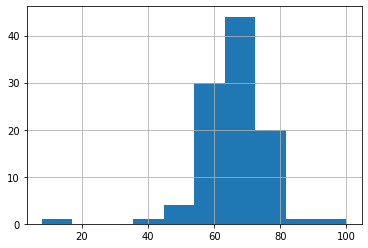

In [34]:
df_grade['Grade'].hist()

<AxesSubplot:>

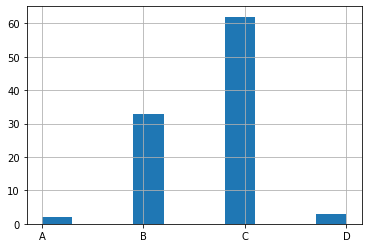

In [35]:
df_grade['LetterGrade'].hist()